In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv("CarData.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
fuel_type_dummy=pd.get_dummies(df["Fuel_Type"],drop_first=True)
seller_type_dummy=pd.get_dummies(df["Seller_Type"],drop_first=True)
transmission_dummy=pd.get_dummies(df["Transmission"],drop_first=True)
df=pd.concat([df,fuel_type_dummy,seller_type_dummy,transmission_dummy],axis=1)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,1,0,0,1


In [5]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104,0.064315,-0.059959,-0.039896,0.000394
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Diesel,0.064315,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Petrol,-0.059959,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Individual,-0.039896,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Manual,0.000394,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


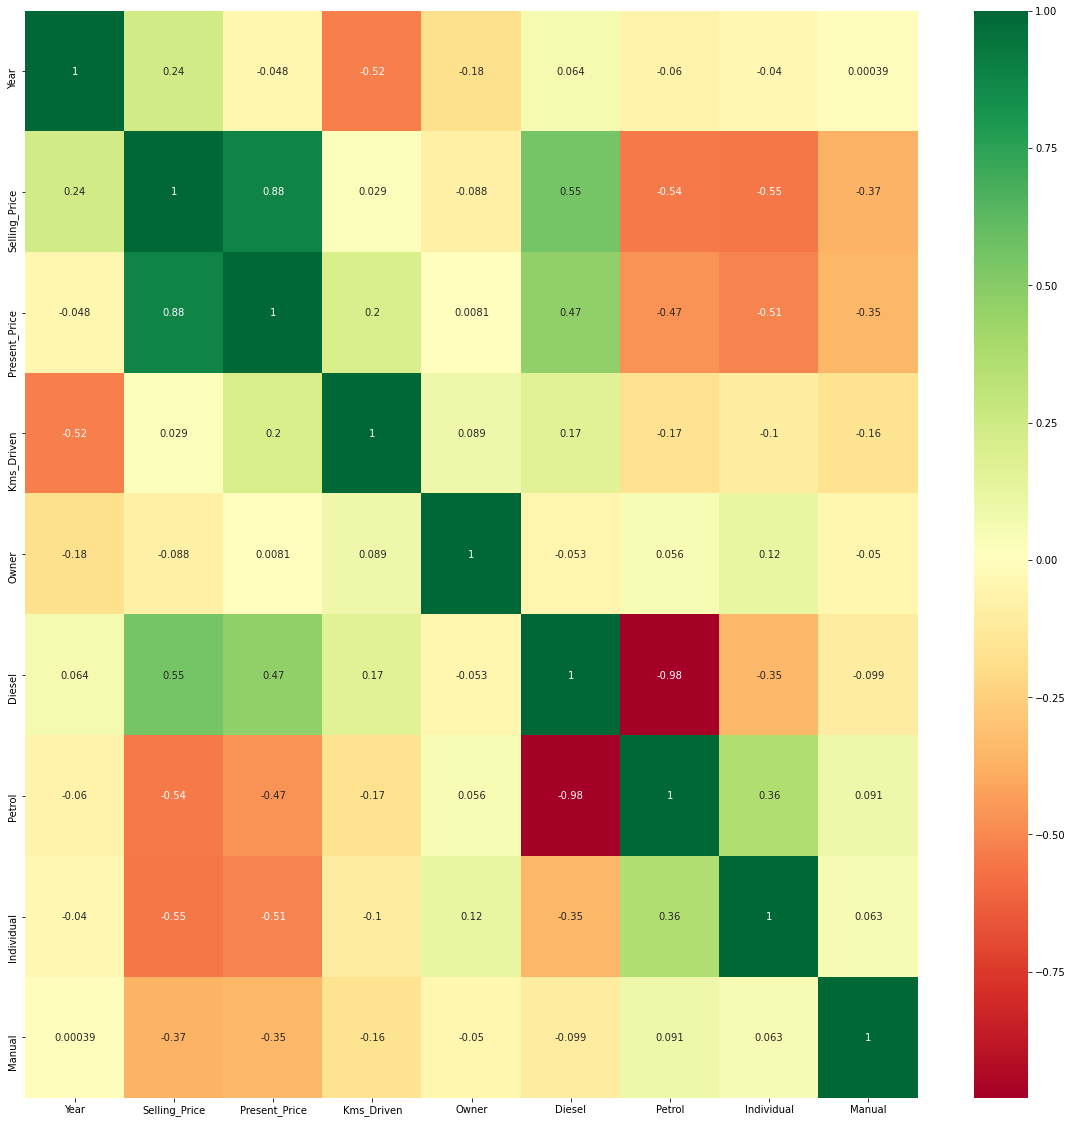

In [6]:
cormat=df.corr()
top_corr=cormat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr].corr(),annot=True,cmap="RdYlGn")

In [7]:
df=df.drop(["Fuel_Type","Seller_Type","Transmission","Car_Name"],axis=1)

In [8]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [9]:
df["Year"]=2020-df["Year"]

In [10]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Diesel,Petrol,Individual,Manual
0,6,3.35,5.59,27000,0,0,1,0,1
1,7,4.75,9.54,43000,0,1,0,0,1
2,3,7.25,9.85,6900,0,0,1,0,1
3,9,2.85,4.15,5200,0,0,1,0,1
4,6,4.60,6.87,42450,0,1,0,0,1


In [11]:
x=df.drop("Selling_Price",axis=1)
y=df["Selling_Price"]

In [12]:
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [13]:
import pickle
file=open('train file.plk','wb')
pickle.dump(model,file)